# Chapter4 線形識別モデル

In [226]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

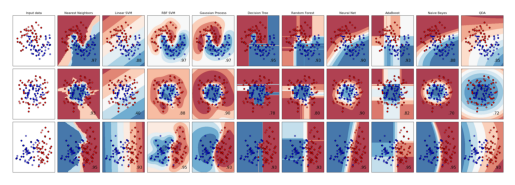

In [227]:
# 画像を読み込む
img = mpimg.imread('classifier_comparison.png') # 画像のパスを指定

# 画像を表示する
plt.imshow(img)
plt.axis('off') # 軸をオフにする
plt.show()

分類問題
- 入力xに対してK個のクラスの一つに割り当てる
  - 入力空間を**決定領域**に分解

- 離散値を取るクラスラベル、領域(0, 1)の値を取る事後確率を予測したい。
  - 一般化線形識別モデルでは非線形関数$f(.)$によって変換
  - 決定面はy=定数なので決定面は$x$の線形関数となる


## 4.1 識別関数 

識別とは入力ベクトル$\mathbf{x}$をKクラスの1つ$C_k$に割り当てる関数である。\
本章では決定面が超平面となる**線形識別**にのみ焦点を当てる。

### 4.1.1 2クラス

最も簡単な線形識別関数の表現
$$
y(x) = \mathbf{w}^T \mathbf{x} + w_0
$$
- $w$は重みベクトル
- $w_0$はバイアスパラメータ

$y(\mathbf{x}) \geq 1$ならば、入力ベクトル$\mathbf{x}$はクラス$C_1$に割り当てられる。それ以外は$C_2$に割り当てられる。\
対応する決定境界は$y(\mathbf{x}) = 0$で定義される。これはD次元入力中のD-1次元超平面に対応する。

原点から決定面までの距離は
$$
\frac{\mathbf{w}^T\mathbf{x}}{||\mathbf{w}||} = - \frac{w_0}{||\mathbf{w}||}
$$
で与えられる。
- $\mathbf{w}$は決定面の法線ベクトルであり、$w_0$は決定面の位置を決定する。
- 決定面から点$x$への直交距離は$r = \frac{y(x)}{||w||}$

In [228]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

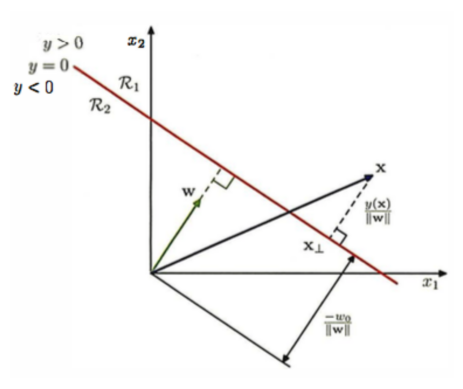

In [229]:
# 画像を読み込む
img = mpimg.imread('2次元線形識別関数の幾何.png') # 画像のパスを指定

# 画像を表示する
plt.imshow(img)
plt.axis('off') # 軸をオフにする
plt.show()

### 4.1.2 多クラス 

2クラス分類器をK-1個用いた**1対他分類器**や2クラス分類器をK個用いた**1対1分類器**では曖昧な領域が存在してしまう。

In [230]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

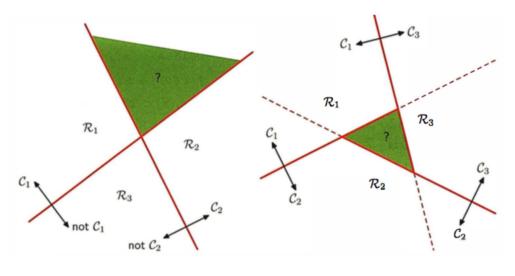

In [231]:
# 画像を読み込む
img = mpimg.imread("多クラス分類の失敗例.png") # 画像のパスを指定

# 画像を表示する
plt.imshow(img)
plt.axis('off') # 軸をオフにする
plt.show()

##### 解決策
K個の線形関数で構成される単独のKクラス識別を考える。
$$
y_k(\mathbf{x}) = \mathbf{w}_k^T \mathbf{x} + w_{k0}
$$
すべての$j \neq k$に対して$y_k(\mathbf{x}) > y_j(\mathbf{x})$であるときに点$\mathbf{x}$をクラス$C_k$に割り当てる。\
このとき決定境界は以下の式で定義され、(D-1)次元の超平面に相当する。
$$
(\mathbf{w}_k - \mathbf{w}_j)^T \mathbf{x} + (w_{k0} - w_{j0}) = 0
$$


線形識別関数のパラメータ学習アプローチ
- 最小二乗法
- フィッシャーの線形判別
- パーセプトロンアルゴリズム

各クラス$C_k$は各クラスごとの線形モデルで記述される。
$$
y_k(\mathbf{x}) = \mathbf{w}_k^{T} \mathbf{x} + w_{k0}
$$

ベクトル表記を用いてひとまとめにすると、
$$
\mathbf{y}(\mathbf{x}) = \mathbf{W}^T \mathbf{x}
$$

$W$は$w_k = (w_{k0}, \mathbf{w}_k^T)^T$で構成される行列である。また、$\mathbf{x}$は$x_0 = 1$を加えたベクトルである。

$$
\mathbf{W} = \begin{pmatrix}
w_{10} & \cdots & w_{k0} & \cdots & w_{K0}\\
\vdots & \ddots &        &        & \vdots \\
w_{1i} &        & w_{ki} &        & w_{Ki} \\
\vdots &        &        & \ddots & \vdots \\
w_{1D} & \cdots & w_{kD} & \cdots & w_{KD}
\end{pmatrix}\\
$$

二乗和誤差関数は
$$
E_D(\mathbf{W}) = \frac{1}{2} Tr{\left\{ (\mathbf{X}\mathbf{W} - \mathbf{T})^T(\mathbf{X}\mathbf{W} - \mathbf{T}) \right\}}
$$

$\mathbf{W}$に関する導関数を0とおき、整理すると、
$$
\bm{y}(\bm{x}) = \bm{T}^T(\bm{X^†})^T\bm{x}
$$

- 問題点
  - 外れ値に弱く、頑健さが欠ける。
  - 誤分類してしまう。

- 原因
  - 二乗和誤差関数は決定境界から遠く離れた「正しすぎる」予測にペナルティを科してしまう。

In [232]:
import numpy as np
from scipy.stats import multivariate_normal as mn
from sklearn.linear_model import RidgeClassifier, LogisticRegression

In [233]:
# データの生成
c1 = mn.rvs(mean=[0, 0], cov=[[1, 0], [0, 1]], size=50)
c2 = mn.rvs(mean=[3, 3], cov=[[1, 0], [0, 1]], size=50)

In [234]:
X = np.vstack((c1, c2))
y = np.array([0]*50+[1]*50)

In [235]:
classifier_rc = RidgeClassifier(solver="lsqr", alpha=0)
classifier_lr = LogisticRegression()
classifier_rc.fit(X, y)
classifier_lr.fit(X, y)

LogisticRegression()

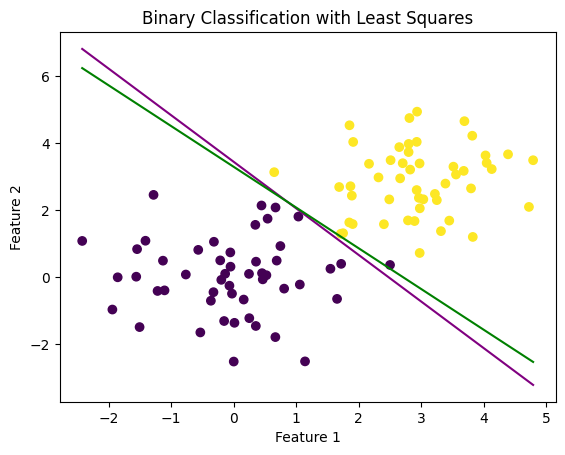

In [236]:
# プロット
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary_rc = -(classifier_rc.coef_[0, 0] * x_boundary + classifier_rc.intercept_) / classifier_rc.coef_[0, 1]
y_boundary_lr = -(classifier_lr.coef_[0, 0] * x_boundary + classifier_lr.intercept_) / classifier_lr.coef_[0, 1]
plt.plot(x_boundary, y_boundary_rc, c="purple")
plt.plot(x_boundary, y_boundary_lr, c="g")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification with Least Squares')
plt.show()

In [237]:
# データの生成
c1 = mn.rvs(mean=[0, 0], cov=[[1, 0], [0, 1]], size=50)
c2 = mn.rvs(mean=[3, 3], cov=[[1, 0], [0, 1]], size=50)
c3 = mn.rvs(mean=[15, 15], cov=[[1, 0], [0, 1]], size=20)

In [238]:
X = np.vstack((c1, c2, c3))
y = np.array([0]*50+[1]*70)

In [239]:
classifier_rc = RidgeClassifier(solver="lsqr", alpha=0)
classifier_lr = LogisticRegression()
classifier_rc.fit(X, y)
classifier_lr.fit(X, y)

LogisticRegression()

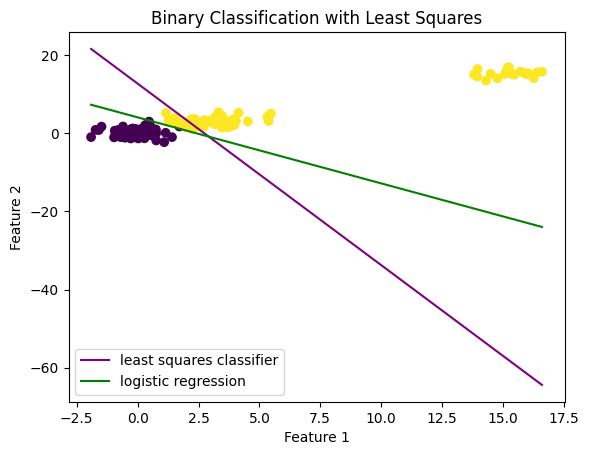

In [240]:
# プロット
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary_rc = -(classifier_rc.coef_[0, 0] * x_boundary + classifier_rc.intercept_) / classifier_rc.coef_[0, 1]
y_boundary_lr = -(classifier_lr.coef_[0, 0] * x_boundary + classifier_lr.intercept_) / classifier_lr.coef_[0, 1]
plt.plot(x_boundary, y_boundary_rc, c="purple", label="least squares classifier")
plt.plot(x_boundary, y_boundary_lr, c="g", label="logistic regression")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification with Least Squares')
plt.legend()
plt.show()

## 4.2 確率的生成モデル

**生成的アプローチ**\
モデル化された条件付き確率分布とクラスの事前分布からベイズの定理を用いて事後確率を求める。\
2クラスの場合、
$$
p(C_1 | \mathbf{x}) = \frac{p(\mathbf{x}|C_1)p(C_1)}{p(\mathbf{x}|C_1)p(C_1) + p(\mathbf{x}|C_2)p(C_2)}
$$
となる。
ここで、
$$
a = \ln \frac{p(\mathbf{x}|C_1)p(C_1)}{p(\mathbf{x}|C_2)p(C_2)}
$$
とおくと、
$$
p(C_1 | \mathbf{x}) = \frac{1}{1 + \exp{(-a)}} = \sigma{(a)}
$$
これを**ロジスティックシグモイド関数**という。

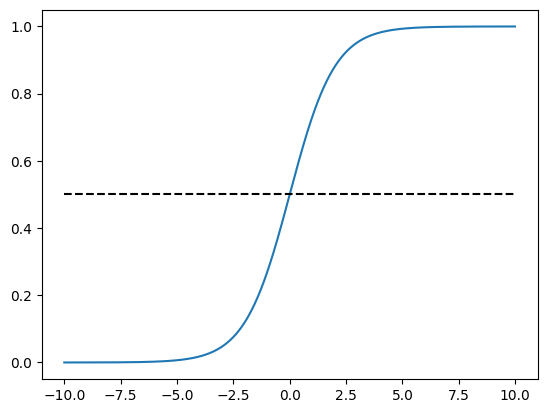

In [244]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_sigmoid(a):
    return 1 / (1 + np.exp(-a))

x = np.arange(-10, 10, 0.01)
y = logistic_sigmoid(x)
plt.plot(x, y)
plt.hlines(y=0.5, xmin=-10, xmax=10, linestyles="--", colors="black")

多クラスの場合、
$$
p(C_k | \mathbf{x}) = \frac{p(\mathbf{x}|C_k)p(C_k)}{\sum_{j}p(\mathbf{x}|C_j)p(C_j)}
$$
となる。
ここで、
$$
a_k = \ln {(p(\mathbf{x}|C_k)p(C_k))}
$$
とおくと、
$$
p(C_k | \mathbf{x}) = \frac{\exp{(a_k)}}{\sum_j {\exp(a_j)}}
$$
これは**ソフトマックス関数**と呼ばれる。

### 4.2.1 連続値入力

クラスの条件付き確率密度関数をガウス分布と仮定。\
さらに、すべてのクラスが同じ共分散行列を共有する場合、確率密度は以下の式で表される。
$$
p(\mathbf{x}|C_k) = \frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}} 
\exp{\left\{-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu}_k)^T \Sigma^{-1}  (\mathbf{x}-\boldsymbol{\mu}_k) \right\}}
$$

In [288]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

In [289]:
mean1 = np.array([0.5, 0.5])
mean2 = np.array([-0.5, -0.5])
cov = np.array([[0.1, 0], [0, 0.1]])

In [290]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# 条件付き確率分布
mn1 = multivariate_normal.pdf(pos, mean=mean1, cov=cov)
mn2 = multivariate_normal.pdf(pos, mean=mean2, cov=cov)

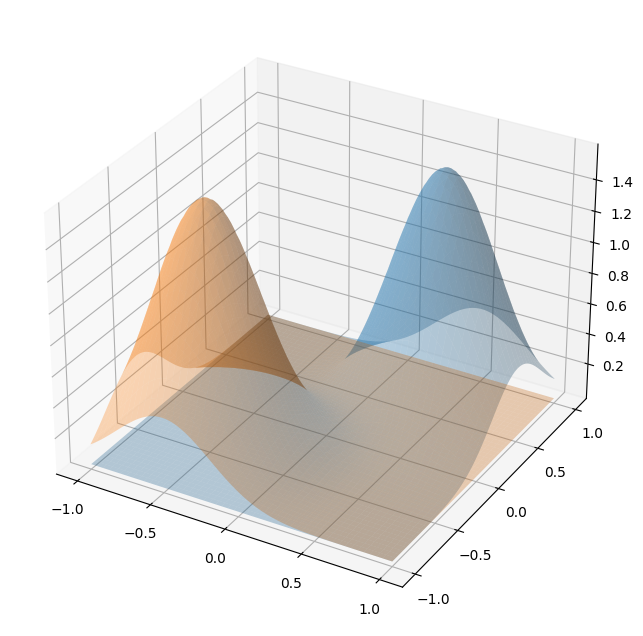

In [291]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, mn1, alpha=0.3)
ax.plot_surface(x, y, mn2, alpha=0.3)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
plt.show()

In [324]:
def logistic_sigmoid(a):
    return 1 / (1 + np.exp(-a))

def calc_posterior(x, mean1, mean2, cov):
    w = np.linalg.inv(cov) @ (mean1 - mean2)
    w0 = -1/2 * mean1.T @ np.linalg.inv(cov) @ mean1 + 1/2 * mean2.T @ np.linalg.inv(cov) @ mean2
    return logistic_sigmoid(w.T @ x + w0)

c1_posterior = np.array([calc_posterior(pos.reshape(10000, 2)[i], mean1, mean2, cov) for i in range(10000)]).reshape(100, 100)

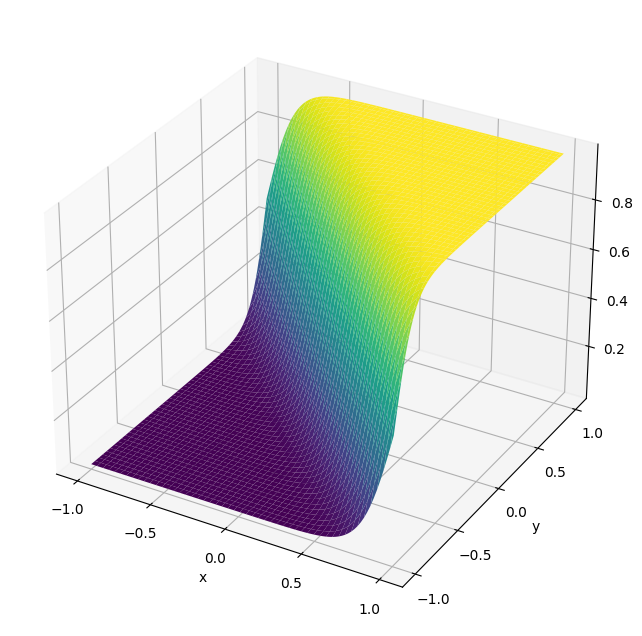

In [330]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, c1_posterior, alpha=1, cmap="viridis")
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

### 4.2.2 最尤解

𝑥の観測値とそれに対応するクラスラベルで構成される学習データ集合が与えられていると仮定。\
クラスの条件付き確率密度$p(x|C_k)$に対するパラメトリックな関数形を決め
て, クラスの事前確率$𝑝(𝐶_k)$とともにパラメータの値を最尤法で決める。

尤度関数は
$$
p(\bm{t}, \bm{X} | \pi, \bm{\mu}_1, \bm{\mu}_2, \bm{\Sigma}) = 
\prod_{n=1}^{N} 
{\left[ \pi N(\bm{x}_n | \bm{\mu_1}, \bm{\Sigma}) \right]^{\bm{t}_n}}
{\left[ (1-\pi) N(\bm{x}_n | \bm{\mu_2}, \bm{\Sigma}) \right]^{1 - \bm{t}_n}}
$$

まず$\pi$, $\mu$, $\Sigma$に関する最大化を考える。対数尤度関数からそれぞれ解くと、
$$
\pi = \frac{N_1}{N_1 + N_2}\\
\bm{\mu_1} = \frac{1}{N_1} \sum_{n=1}^{N} {t_n\bm{x}_n}\\
\bm{\mu_2} = \frac{1}{N_2} \sum_{n=1}^{N} {(1-t_n)\bm{x}_n}\\
\Sigma = \frac{1}{N} 
\sum_{k \in \left\{0, 1\right\}} 
\sum_{n \in C_k} 
{(\bm{x}_n - \bm{\mu}_k)} {(\bm{x}_n - \bm{\mu}_k)}^T
$$

## 4.3 確率的識別モデル

これまでのアプローチはクラスの条件付き確率密度と事前確率を別々にフィットし、それらにベイズの定理を適用して一般線形モデルのパラメータを探索するアプローチであった。\
ここからは一般線形モデルの関数形式を陽に仮定し、最尤法を利用して一般化線形モデルのパラメータを直接決定する。


### 4.3.1 固定基底関数

- 固定基底関数
  - 基底関数ベクトルを用いて入力の非線形変換を行う
  - 決定境界を非線形にすることができる

### 4.3.2 ロジスティック回帰

2クラスの場合を考えると、クラス$C_1$に対する事後確率は
$$
p(C_1 | \phi) = y(\phi) = \sigma(\bm{w}^T\phi)
$$

尤度関数は
$$
p(\bm{t}|\bm{w}) = \prod_{n=1}^N y_n^{t_n} (1-y_n)^{1-t_n}
$$
尤度の負の対数を取ると**交差エントロピー誤差関数**と呼ばれる関数となる。
$$
E(\bm{w}) = -\ln p(\bm{t}| \bm{w}) = 
-\sum_{n=1}^N {t_n \ln y_n + (1 - t_n) \ln {(1-y_n)}}
$$

$w$に対する誤差関数の勾配を取ると、
$$
\nabla E(\bm{w}) = \sum_{n=1}^N (y_n - t_n) \phi(x_n)
$$

- 線形分離可能なデータ集合に対しては最尤法は過学習を起こしてしまう
- どの分離超平面も学習データに対して同じ事後確率を生じるため, 解が連続して無限に生じる

最急降下法
$$
\bm{w}^{t+1} = \bm{w}^t - \eta \nabla E(\bm{w})
$$

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['class'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df_iris = df_iris[df_iris["class"] != 2]
df_iris = df_iris[["petal length (cm)","petal width (cm)","class"]]
df_iris

,petal length (cm),petal width (cm),class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [16]:
X = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, -1].values

In [17]:
class TwoClassLogisticRegression(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=0) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, t):
        self.num_samples = X.shape[0]
        self.num_features = X.shape[1]
        rgen = np.random.RandomState(self.random_state)
        self.intercept_ = rgen.normal(loc=0.0, scale=0.01, size=1)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=self.num_features)
        self.costs = []

        for _ in range(self.n_iter):
            output = X @ self.coef_ + self.intercept_
            output = 1 / (1 + np.exp(-output))
            self.coef_ += self.eta * X.T @ (t - output)
            self.intercept_ += self.eta * (t - output).sum()
            cost = (-t @ np.log(output)) - ((1-t) @ np.log(1-output))
            self.costs.append(cost)


    def prediction(self, X):
        return np.where(self._activation(self._net_input(X)) >= 0.5, 1, 0)

In [18]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [20]:
lr = TwoClassLogisticRegression(eta=0.1)
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[0.69217255]
[4.37177528 4.37654869]


In [21]:
X_comb = np.vstack((X_train, X_test))
y_comb = np.hstack((y_train, y_test))

(-1.3199455184946902, 1.9032430841889447)

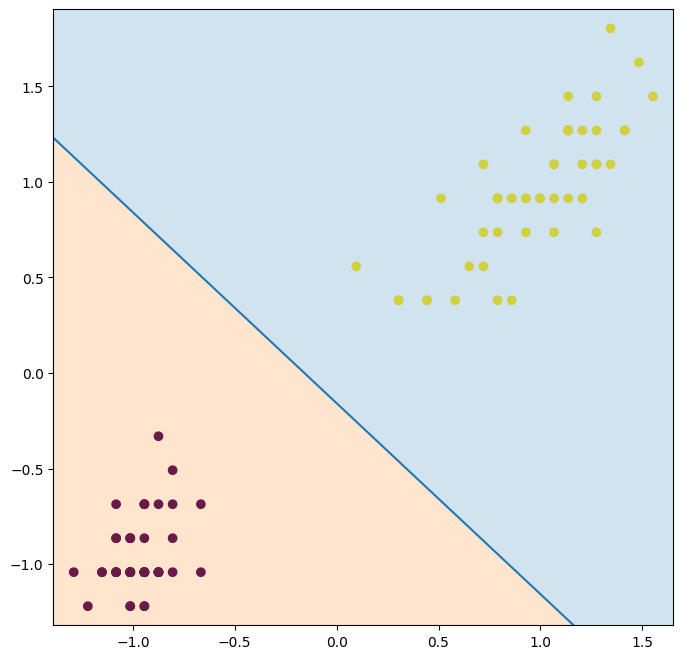

In [22]:
x = np.linspace(X_comb[:, 0].min()-1, X_comb[:, 0].max()+1, 1000)
y = -(lr.intercept_ + lr.coef_[0] * x) / lr.coef_[1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()


ax.scatter(X_comb[:, 0], X_comb[:, 1], c=y_comb)
ax.plot(x, y)
ax.fill_between(x, y, X_comb[:, 1].max()+1, alpha=0.2)
ax.fill_between(x, X_comb[:, 1].min()-1, y, alpha=0.2)

ax.set_xlim(X_comb[:, 0].min()-0.1, X_comb[:, 0].max()+0.1)
ax.set_ylim(X_comb[:, 1].min()-0.1, X_comb[:, 1].max()+0.1)

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["class"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 4.4 ラプラス近似